## Summary

#### 1) Imports and treatments
#### 2) Exploratory data analysis
    - Time series analysis
    - Categorical variables grouped analysis
    - Deep dive boxplots whithout outliers

## 1) Imports and treatments

In [3]:
import os
from time import time

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [6]:
data = pd.read_csv('data_treated.csv')

In [7]:
data.head()

,Date_YMD,Time_to_Travel,Lenght_of_Stay,Advertisers_ID,Platform_Country_Code,Qty_of_Clicks,Qty_of_Bookings,Booking_Conversion_Rate,Advertisers_Gross_Revenue,Advertisers_Total_Profit,Company_Gross_Revenue
0,2020-07-29,8-14,1,345,FI,22,0,0.000,0,0.000,51
1,2020-04-28,41-300,13-14,64,US,5,0,0.000,0,0.000,146
2,2020-08-10,2-4,1,64,IL,351,5,0.014,103666,15549.900,3474
3,2020-08-24,8-14,15+,139,TR,8,0,0.000,0,0.000,48
4,2020-09-10,2-4,13-14,56,HK,7,0,0.000,0,0.000,73


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008218 entries, 0 to 1008217
Data columns (total 11 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Date_YMD                   1008218 non-null  object 
 1   Time_to_Travel             1008218 non-null  object 
 2   Lenght_of_Stay             1008218 non-null  object 
 3   Advertisers_ID             1008218 non-null  int64  
 4   Platform_Country_Code      1008218 non-null  object 
 5   Qty_of_Clicks              1008218 non-null  int64  
 6   Qty_of_Bookings            1008218 non-null  int64  
 7   Booking_Conversion_Rate    1008218 non-null  float64
 8   Advertisers_Gross_Revenue  1008218 non-null  int64  
 9   Advertisers_Total_Profit   1008218 non-null  float64
 10  Company_Gross_Revenue      1008218 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 84.6+ MB


In [9]:
# treating data column and creating new ones to better analyse the data 
data['Date_YMD'] = pd.to_datetime(data['Date_YMD'], format='%Y-%m-%d')
data['Month'] = data['Date_YMD'].dt.month
data['Day'] = data['Date_YMD'].dt.day

In [10]:
# function to create seasons (warning: may take a while to load)
def season_of_date(date):
    year = str(date.year)
    seasons = {'spring': pd.date_range(start= year +'-03-21', end=year + '-06-20'),
               'summer': pd.date_range(start= year + '-06-21', end= year + '-09-22'),
               'autumn': pd.date_range(start= year + '-09-23', end= year + '-12-20')}
    if date in seasons['spring']:
        return 'spring'
    if date in seasons['summer']:
        return 'summer'
    if date in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'

data['Years_Season'] = data.Date_YMD.map(season_of_date)

In [11]:
# function to create quarters (warning: may take a while to load)
def quarters(date):
    year = str(date.year)
    seasons = {'Q1': pd.date_range(start= year +'-01-01', end=year + '-03-31'),
               'Q2': pd.date_range(start= year + '-04-01', end= year + '-06-30'),
               'Q3': pd.date_range(start= year + '-07-01', end= year + '-09-30')}
    if date in seasons['Q1']:
        return 'Q1'
    if date in seasons['Q2']:
        return 'Q2'
    if date in seasons['Q3']:
        return 'Q3'
    else:
        return 'Q4'

data['Quarters'] = data.Date_YMD.map(quarters)

In [12]:
# new columns to understand if its a week day
data['Day_of_Week'] = data['Date_YMD'].dt.weekday

In [13]:
# changing the type of specific columns
data['Advertisers_ID'] = data['Advertisers_ID'].astype('string')
data['Month'] = data['Month'].astype(object)
data['Day'] = data['Day'].astype('string')
data['Day_of_Week'] = data['Day_of_Week'].astype(object)

In [14]:
# booking convertion rate *100
data['Booking_Conversion_Rate'] = data['Booking_Conversion_Rate']*100

## 2) Exploratory data analysis

In [15]:
data['Booking_Conversion_Rate'].describe()

count   1008218.000
mean          2.229
std           7.149
min           0.000
25%           0.000
50%           0.000
75%           0.000
max         500.000
Name: Booking_Conversion_Rate, dtype: float64

In [16]:
data.describe()

,Qty_of_Clicks,Qty_of_Bookings,Booking_Conversion_Rate,Advertisers_Gross_Revenue,Advertisers_Total_Profit,Company_Gross_Revenue
count,1008218.000,1008218.000,1008218.000,1008218.000,1008218.000,1008218.000
mean,54.609,1.255,2.229,25665.459,3849.819,1251.223
std,238.733,9.184,7.149,135591.903,20338.785,7834.226
min,2.000,0.000,0.000,0.000,0.000,0.000
25%,3.000,0.000,0.000,0.000,0.000,22.000
50%,8.000,0.000,0.000,0.000,0.000,83.000
75%,27.000,0.000,0.000,0.000,0.000,381.000
max,15527.000,910.000,500.000,11230915.000,1684637.250,1070120.000


- Attention point: we can see that this data have some outliers. So if we wanted to do a predictive model, we would have to remove this outliers first. Also, I chose not to remove at this point because I wanted to understand how much they are impacting the data. Latter, we will see a boxplot analysis without them.

<AxesSubplot:>

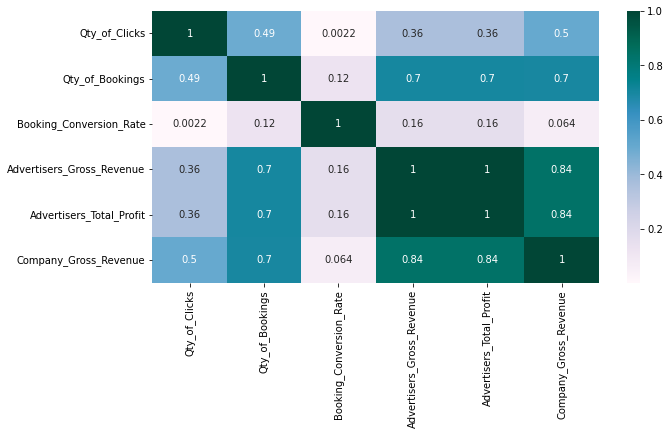

In [17]:
#correlation map
plt.figure(figsize=(10,5))
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns, annot=True, cmap='PuBuGn')

- Strong correlation between Advertisers_Gross_Revenue and Company_Gross_Revenue. Basically, if Advertisers have profit, the company has profit.
- Strong correlation among Qty_of_Bookings, Advertiser's and Company's revenue. Also, strong correlation between Bookings_Conversion_Rate and Company_Revenue.

### Time series analysis

In [18]:
datetime_grouped = data.groupby(['Date_YMD'])[['Qty_of_Clicks', 'Qty_of_Bookings',
       'Booking_Conversion_Rate', 'Advertisers_Gross_Revenue',
       'Advertisers_Total_Profit', 'Company_Gross_Revenue']].agg('mean')

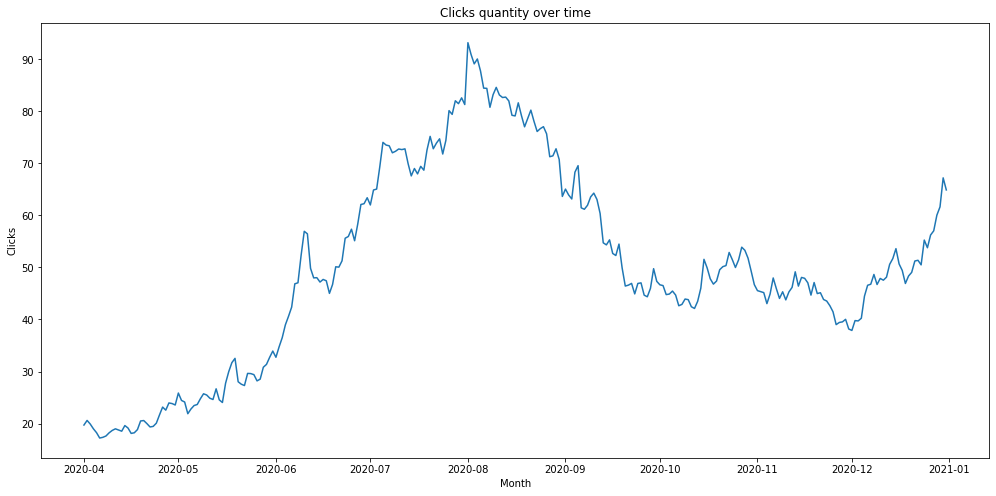

In [19]:
plt.figure(figsize=(17, 8))
plt.plot(datetime_grouped.Qty_of_Clicks)
plt.title('Clicks quantity over time')
plt.ylabel('Clicks')
plt.xlabel('Month')
plt.grid(False)
plt.show()

- Here we can see a peak of clicks that happens from mid-June to mid-September

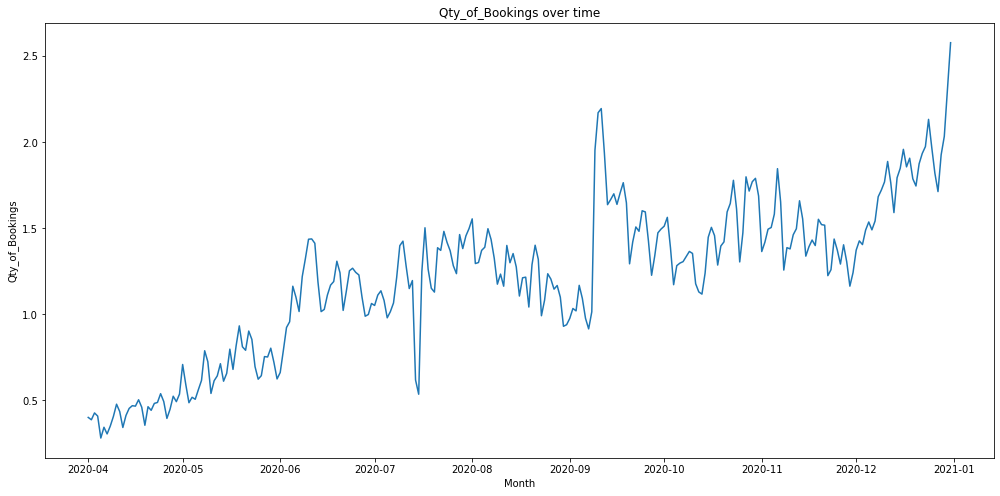

In [20]:
plt.figure(figsize=(17, 8))
plt.plot(datetime_grouped.Qty_of_Bookings)
plt.title('Qty_of_Bookings over time')
plt.ylabel('Qty_of_Bookings')
plt.xlabel('Month')
plt.grid(False)
plt.show()

- Here the number of clicks will gradually increase until it reaches two peaks: one between September and October, and the other starting in January

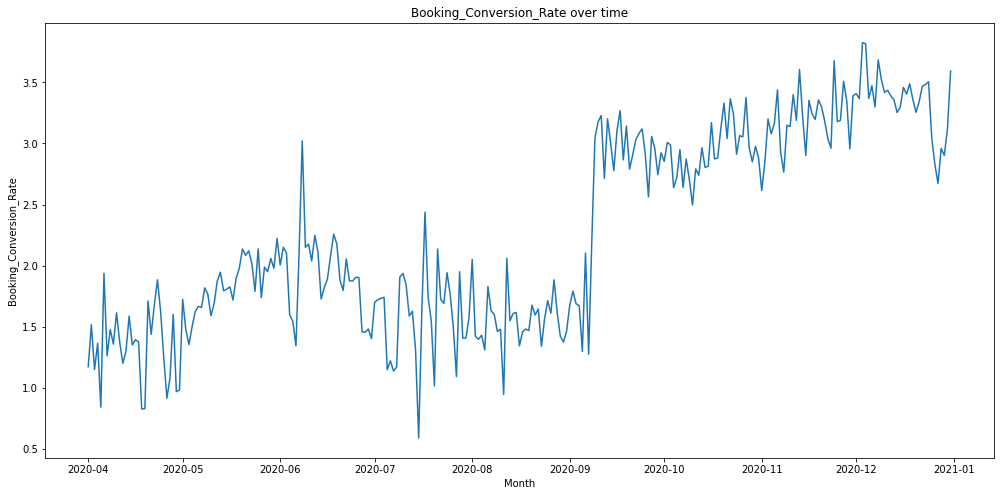

In [21]:
plt.figure(figsize=(17, 8))
plt.plot(datetime_grouped.Booking_Conversion_Rate)
plt.title('Booking_Conversion_Rate over time')
plt.ylabel('Booking_Conversion_Rate')
plt.xlabel('Month')
plt.grid(False)
plt.show()

- There is a considerable peak in the conversion rate in June, but the trend is that the rate will be higher from the end of September on

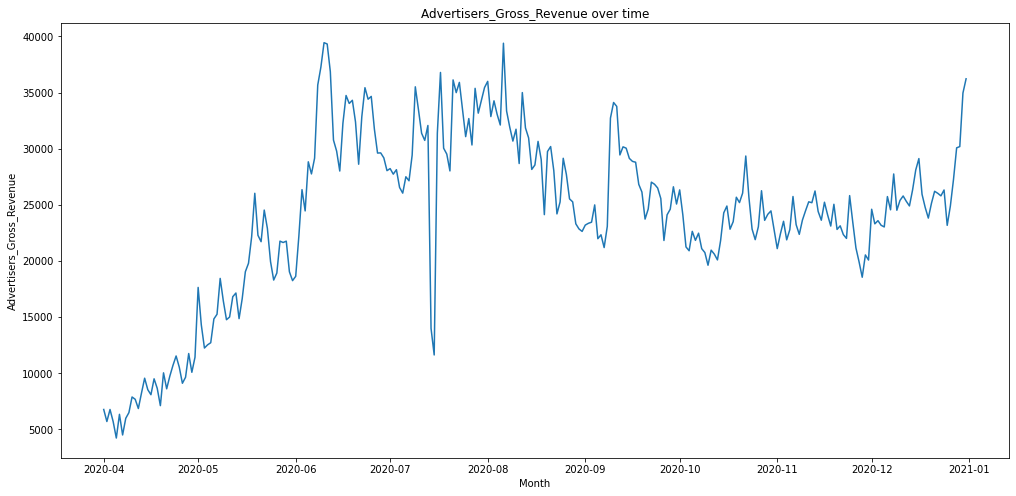

In [22]:
plt.figure(figsize=(17, 8))
plt.plot(datetime_grouped.Advertisers_Gross_Revenue)
plt.title('Advertisers_Gross_Revenue over time')
plt.ylabel('Advertisers_Gross_Revenue')
plt.xlabel('Month')
plt.grid(False)
plt.show()

- The question here is: what happened between July and August? Maybe some new news regarding Covid-19?

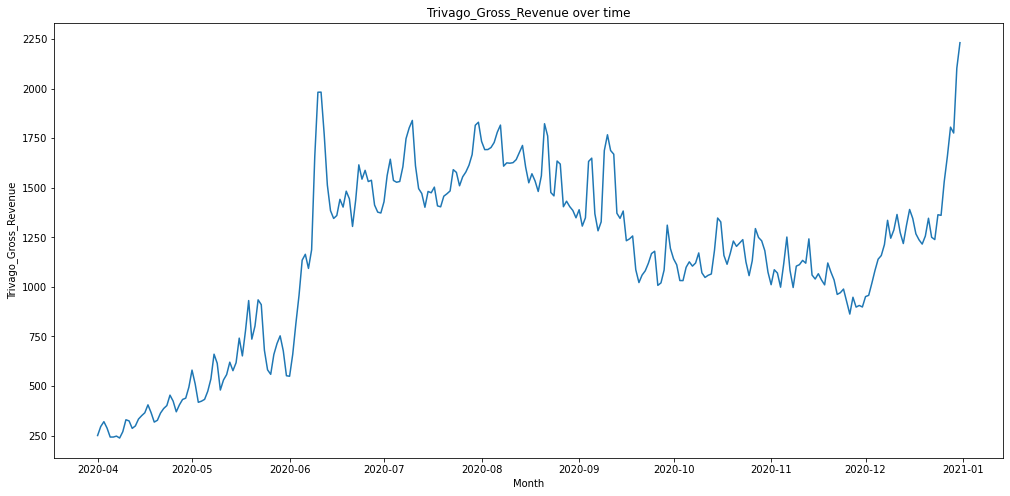

In [24]:
plt.figure(figsize=(17, 8))
plt.plot(datetime_grouped.Company_Gross_Revenue)
plt.title('Trivago_Gross_Revenue over time')
plt.ylabel('Trivago_Gross_Revenue')
plt.xlabel('Month')
plt.grid(False)
plt.show()

- COmpany's revenue is directly related to the amount of clicks, that is why we can see the same pattern that occur in the graph of the number of clicks

### Categorical variables grouped analysis

In [26]:
#The day of the week with Monday=0, Sunday=6.
Day_of_Week_grouped = data.groupby(['Day_of_Week'])[['Qty_of_Clicks', 'Qty_of_Bookings',
       'Booking_Conversion_Rate', 'Advertisers_Gross_Revenue',
       'Advertisers_Total_Profit', 'Company_Gross_Revenue']].agg('mean').sort_values(by='Day_of_Week')

Day_of_Week_grouped.style.background_gradient(cmap='YlGn')

,Qty_of_Clicks,Qty_of_Bookings,Booking_Conversion_Rate,Advertisers_Gross_Revenue,Advertisers_Total_Profit,Company_Gross_Revenue
Day_of_Week,,,,,,
0,54.572594,1.169797,2.153095,25116.633285,3767.494993,1200.355356
1,55.169582,1.227089,2.255773,25768.965423,3865.344814,1250.987021
2,54.396578,1.270757,2.235867,25788.798987,3868.319848,1264.663732
3,54.509736,1.343372,2.330286,27111.586679,4066.738002,1300.748826
4,54.323843,1.383797,2.357662,26771.790081,4015.768512,1325.211187
5,54.604358,1.291281,2.188983,24791.092070,3718.663810,1246.331217
6,54.665982,1.110616,2.088104,24354.383236,3653.157485,1175.772603


- Interesting to see that most of clicks happen on Tuesday, but the covertion rate is bigger on Thursday and Friday. It seams that the users need a few days to decide if they are really going to travel or not
- The Booking_Convertion_Rate is bigger on friday, but the Advertisers_Gross_Revenue and profit are bigger on Thursday. Maybe it is the pricing policy of some hotels or maybe promotions during the period... it is hard to say, I would need more data to deepen the analysis. But the important thing here is to see that Company's revenue really depends on the clicks and bookings. How much the hotels charge for the reservation is not directly related to the company itself. 

In [28]:
Month_grouped = data.groupby(['Month'])[['Qty_of_Clicks', 'Qty_of_Bookings',
       'Booking_Conversion_Rate', 'Advertisers_Gross_Revenue',
       'Advertisers_Total_Profit','Company_Gross_Revenue']].agg('mean').sort_values(by='Month')

Month_grouped.style.background_gradient(cmap='YlGn')

,Qty_of_Clicks,Qty_of_Bookings,Booking_Conversion_Rate,Advertisers_Gross_Revenue,Advertisers_Total_Profit,Company_Gross_Revenue
Month,,,,,,
4,19.939015,0.434562,1.332287,8326.731435,1249.009715,344.738014
5,27.581575,0.697981,1.853289,18559.869169,2783.980375,641.806817
6,50.091266,1.135409,1.914441,31332.557107,4699.883566,1380.112698
7,73.017279,1.224353,1.577002,30305.396329,4545.809449,1566.785626
8,80.537706,1.244240,1.548474,29724.301136,4458.645170,1606.601962
9,55.025055,1.465216,2.640348,26325.432036,3948.814805,1308.635917
10,47.269936,1.433665,2.926747,23143.399181,3471.509877,1147.072717
11,44.409660,1.430587,3.179423,23137.804224,3470.670634,1038.809983
12,50.410371,1.794832,3.342204,26307.449913,3946.117487,1351.352957


- The same case mentioned before happens with the months. It's interesting to see that a lot of clicks happens on July and August. But the majority of bookings happen on December. And even though the Company's revenue is bigger during this months, the booking conversion rate it isn't. This made me think, maybe it is because of the outliers or maybe there are some other metrics involving clicks that also bring revenue to the company that I'm not aware of.

In [29]:
Years_Season_grouped = data.groupby(['Years_Season'])[['Qty_of_Clicks', 'Qty_of_Bookings',
       'Booking_Conversion_Rate', 'Advertisers_Gross_Revenue',
       'Advertisers_Total_Profit', 'Company_Gross_Revenue']].agg('mean').sort_values(by='Company_Gross_Revenue', ascending=False)

Years_Season_grouped.style.background_gradient(cmap='YlGn')

,Qty_of_Clicks,Qty_of_Bookings,Booking_Conversion_Rate,Advertisers_Gross_Revenue,Advertisers_Total_Profit,Company_Gross_Revenue
Years_Season,,,,,,
winter,57.282393,2.014266,3.153763,28282.982914,4242.447437,1610.793264
summer,70.916952,1.275370,1.788801,29432.458129,4414.868719,1528.904382
autumn,46.180022,1.480327,3.100395,23764.409225,3564.661384,1124.324279
spring,31.711422,0.774430,1.765867,20023.532413,3003.529862,792.209685


- A lot of clicks happening on Summer, but the majority of bookings happen on Winter. Probably something to do with the hotel's price as well. Because we can see that the Advertisers revenue is bigger during summer

In [30]:
Quarters_grouped = data.groupby(['Quarters'])[['Qty_of_Clicks', 'Qty_of_Bookings',
       'Booking_Conversion_Rate', 'Advertisers_Gross_Revenue',
       'Advertisers_Total_Profit', 'Company_Gross_Revenue']].agg('mean').sort_values(by='Quarters')

Quarters_grouped.style.background_gradient(cmap='YlGn')

,Qty_of_Clicks,Qty_of_Bookings,Booking_Conversion_Rate,Advertisers_Gross_Revenue,Advertisers_Total_Profit,Company_Gross_Revenue
Quarters,,,,,,
Q2,35.831702,0.831296,1.758119,21855.247897,3278.287185,901.500838
Q3,70.218492,1.303251,1.885342,28914.942699,4337.241405,1503.232189
Q4,47.263634,1.536868,3.127178,24054.341503,3608.151225,1171.473200


- No surprises here, same patterns found when analyzing the seasons. Most of clicks happen on Q3, but the majority of bookings happens on Q4

In [31]:
Time_to_Travel_grouped = data.groupby(['Time_to_Travel'])[['Qty_of_Clicks', 'Qty_of_Bookings',
       'Booking_Conversion_Rate', 'Advertisers_Gross_Revenue',
       'Advertisers_Total_Profit', 'Company_Gross_Revenue']].agg('mean').sort_values(by='Time_to_Travel')

Time_to_Travel_grouped.style.background_gradient(cmap='YlGn')

,Qty_of_Clicks,Qty_of_Bookings,Booking_Conversion_Rate,Advertisers_Gross_Revenue,Advertisers_Total_Profit,Company_Gross_Revenue
Time_to_Travel,,,,,,
0,62.552046,4.251426,5.448015,51684.734646,7752.710197,2827.532535
15-28,65.739733,0.886221,1.517811,24410.698270,3661.604740,1201.973854
2-4,55.419683,1.494191,2.754158,26931.260322,4039.689048,1495.351286
29-40,50.550055,0.542258,1.515584,15952.751115,2392.912667,756.395352
301+,7.102108,0.120327,1.981859,8337.177794,1250.576669,119.651248
41-300,37.055409,0.646993,1.456614,27695.113318,4154.266998,741.672901
5-7,50.482782,0.839413,2.027759,16739.990225,2510.998534,956.181477
8-14,75.097526,0.953215,1.616064,22500.206851,3375.031028,1341.711200


- Most of clicks happens in a 8-14 days time to travel window. However, if the users book their travels in the same day, the company and the advertisers will won more. Probably also something to do with the hotels price.

In [32]:
Lenght_of_Stay_grouped = data.groupby(['Lenght_of_Stay'])[['Qty_of_Clicks', 'Qty_of_Bookings',
       'Booking_Conversion_Rate', 'Advertisers_Gross_Revenue',
       'Advertisers_Total_Profit', 'Company_Gross_Revenue']].agg('mean').sort_values(by='Company_Gross_Revenue', ascending=False)

Lenght_of_Stay_grouped.style.background_gradient(cmap='YlGn')

,Qty_of_Clicks,Qty_of_Bookings,Booking_Conversion_Rate,Advertisers_Gross_Revenue,Advertisers_Total_Profit,Company_Gross_Revenue
Lenght_of_Stay,,,,,,
1,117.884585,2.647738,1.972989,23440.685938,3516.102891,1924.057711
2,46.609271,1.493105,2.945025,35139.579003,5270.936851,1598.994379
4-6,39.047767,0.632085,2.398203,35502.656442,5325.398466,1174.871910
3,32.105016,0.794643,2.809764,29971.025047,4495.653757,1153.381019
7,16.391974,0.191628,1.651408,16179.142997,2426.871450,455.240088
8-12,10.886340,0.140114,1.710923,14190.235358,2128.535304,337.965203
13-14,6.660973,0.075426,1.444466,8674.703321,1301.205498,217.110640
15+,5.692691,0.064220,1.226267,8518.688605,1277.803291,201.744488


- Basically hotels have more profit if the users make reservations between 2 and 6 days. However, for the company, if they book for only 1 day, it's better.

In [33]:
Advertisers_ID_grouped = data.groupby(['Advertisers_ID'])[['Qty_of_Clicks', 'Qty_of_Bookings',
       'Booking_Conversion_Rate', 'Advertisers_Gross_Revenue',
       'Advertisers_Total_Profit', 'Company_Gross_Revenue']].agg('mean').sort_values(by='Company_Gross_Revenue', ascending=False)

Advertisers_ID_grouped.style.background_gradient(cmap='YlGn')

,Qty_of_Clicks,Qty_of_Bookings,Booking_Conversion_Rate,Advertisers_Gross_Revenue,Advertisers_Total_Profit,Company_Gross_Revenue
Advertisers_ID,,,,,,
7,123.060805,10.309530,6.322068,234688.199012,35203.229852,12778.347016
332,404.959187,4.384822,1.144788,36233.291726,5434.993759,2714.335816
58,55.158490,1.685101,2.046751,43999.190820,6599.878623,2367.497009
64,52.936693,1.455285,2.822828,40594.565250,6089.184788,1874.662397
139,260.491276,6.226388,1.760769,49141.817448,7371.272617,1248.398198
151,29.110827,0.148053,0.819819,5616.025556,842.403833,881.588721
56,63.409480,1.188615,2.132261,13458.216016,2018.732402,850.558462
90,33.800261,0.914071,2.247615,11670.737237,1750.610586,608.086062
402,22.595297,0.255211,2.175955,8169.652118,1225.447818,231.666770


- Advertiser 7 brings a lot of revenue to the company, the question here is why. Maybe its because of the destiny. Also, why the amount of clicks on the advertiser 332 is so large while the amount of bookings is considerably smaller? Question to understand better in the future.

### Deep Dive - Analysis without outliers for Time_to_Travel, Lenght_of_Stay, Years_Season, Quarters

In [34]:
numerical_values = ['Qty_of_Clicks', 'Qty_of_Bookings', 'Booking_Conversion_Rate', 'Advertisers_Gross_Revenue','Advertisers_Total_Profit', 'Company_Gross_Revenue']

In [35]:
def plot_compare_distributions(df, feature):
    f, [ax1,ax2,ax3,ax4] = plt.subplots(1,4, figsize=(25,5))
    g = sns.boxplot(x='Time_to_Travel', order=['0', '2-4', '5-7', '8-14', '15-28', '29-40', '41-300', '301+'], y=feature, data=df, ax=ax1, showfliers=False, palette='GnBu')
    g = sns.boxplot(x='Lenght_of_Stay', order=['1', '2', '3', '4-6', '7', '8-12', '13-14', '15+'], y=feature, data=df, ax=ax2, showfliers=False, palette='GnBu')
    g = sns.boxplot(x='Years_Season', y=feature, data=df, ax=ax3, showfliers=False, palette='GnBu')
    g = sns.boxplot(x='Quarters', y=feature, data=df, ax=ax4, showfliers=False, palette='GnBu')

100%|██████████| 6/6 [00:08<00:00,  1.44s/it]


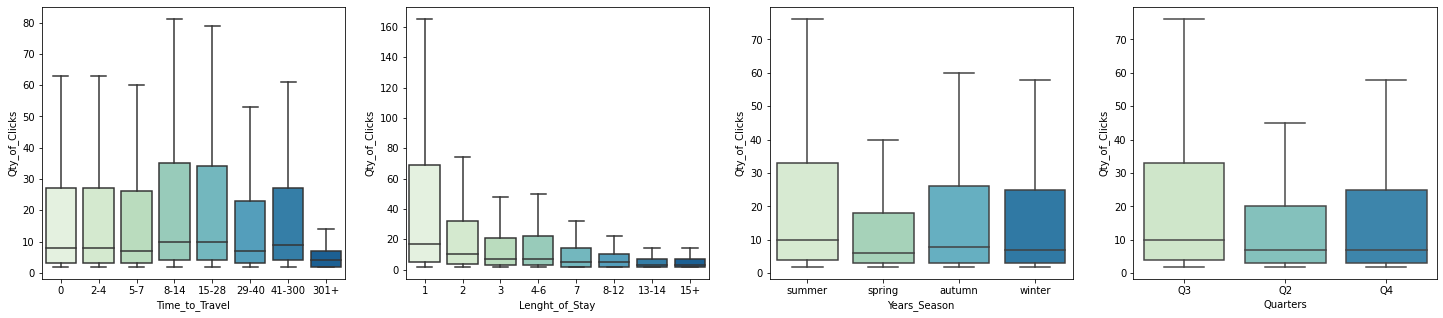

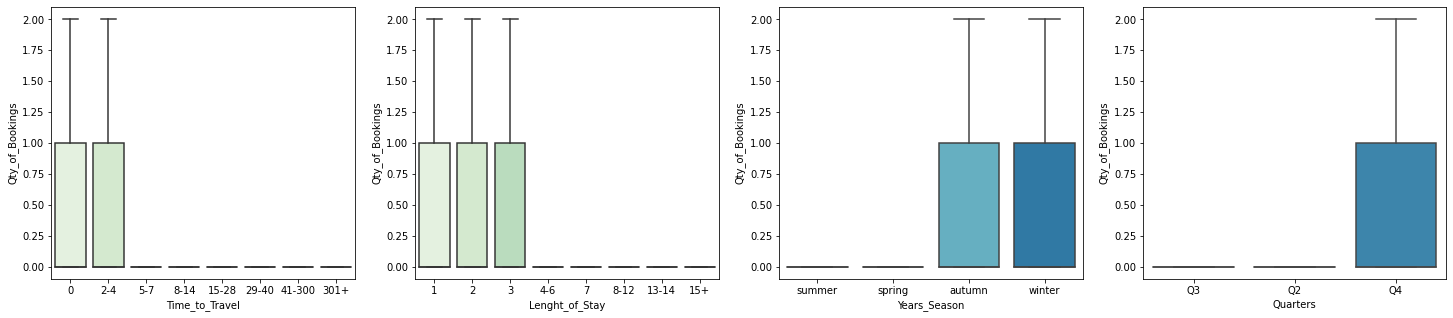

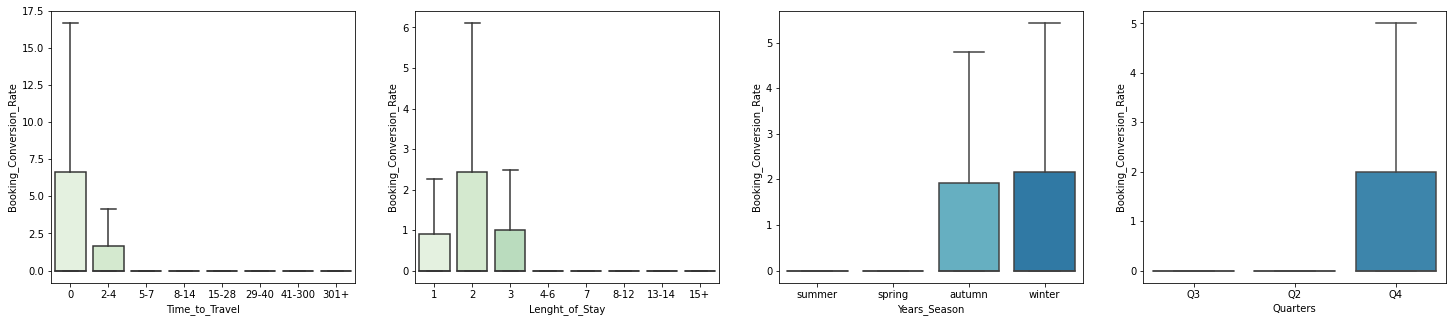

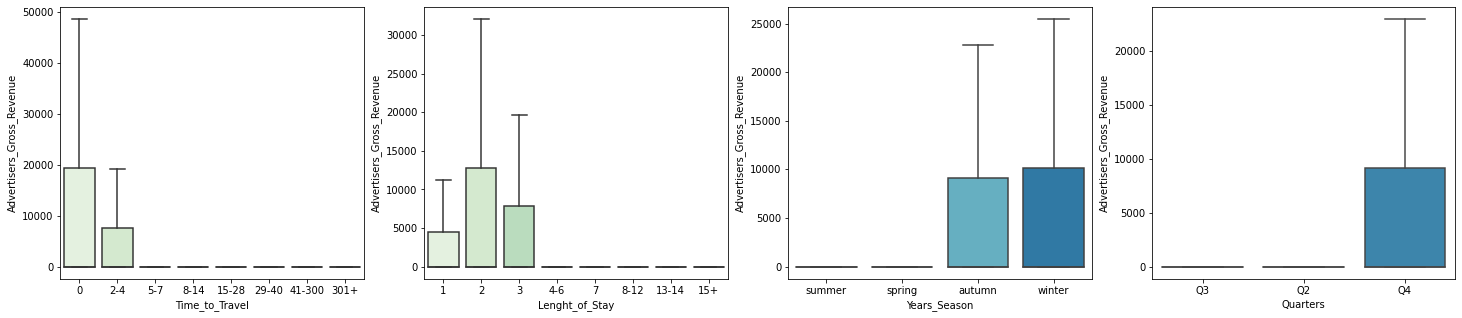

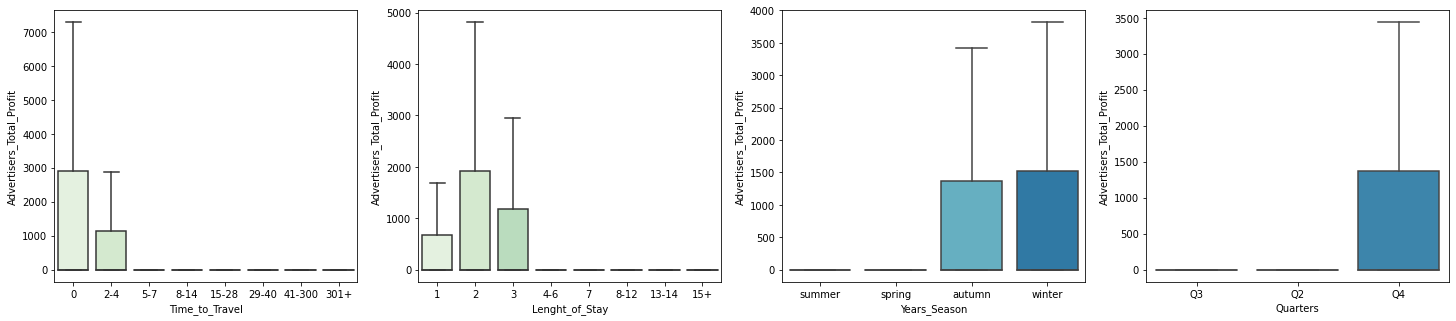

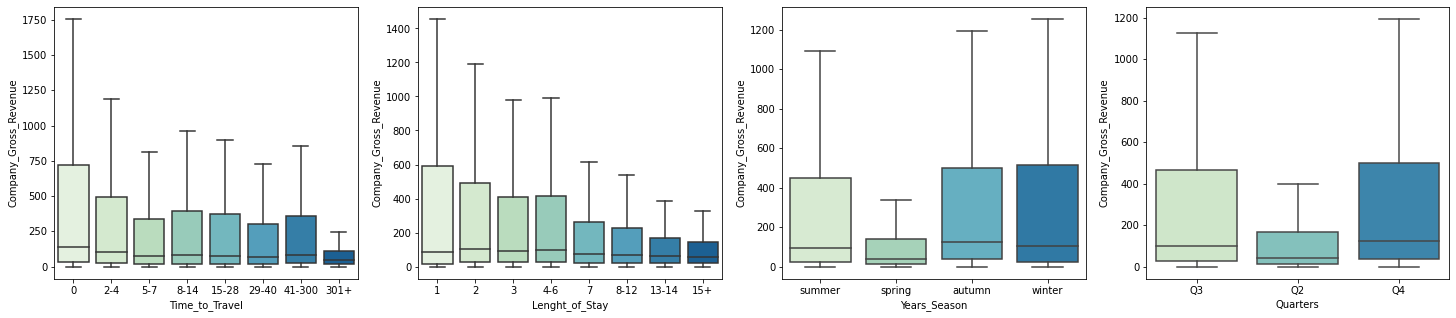

In [36]:
for i in tqdm(numerical_values):
    plot_compare_distributions(df=data, feature=i)

- Insights:
    * For Time_To_Travel the best results regarding bookings and revenue occur in a window from 0 to 4 days until check in. However, when talking about clicks, the best results occur in the 8 to 28 day window. As mentioned before, people take some time to plan until they actually decide to make a reservation
    * For Lenght_of_Stay the amount of clicks for just one day's stay is higher compared to other days. However, the booking_conversion_rate is higher for 2-day stays.
    * For Years_Season, as metioned before a lot of clicks happening on Summer, but the majority of bookings happen on Autumn/Winter.
    * And, for quarters, we observe the same patterns as before. It seems that the outliers do not interfere so much in the analysis.